In [8]:
import numpy as np
from ptychoSampling.reconstruction.recons import FarFieldGaussianReconstructionT
from ptychoSampling.utils.utils import getRandomComplexArray
import matplotlib.pyplot as plt
import tensorflow as tf
from copy import deepcopy
from ptychoSampling.farfield.simulation import Simulation
from ptychoSampling.probe import RectangleProbe
import dill

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
# Whether to reload existing simulation data (if available) or to create new data
reload_simulation = False

In [6]:
if reload_simulation:
    try:
        with open('simulation.pkl', 'rb') as f:
            sim = dill.load(f)
    except:
        sim = Simulation()
        
        names_items = {'simulation': sim}
                       #'obj':obj, 
                       #'probe':probe, 
                       #'detector':detector}
        for name, item in names_items.items():
            with open(f'{name}.pkl', 'wb') as f:
                dill.dump(item, f)
else:
    sim = Simulation()

# Starting the reconstruction with a random object guess

In [7]:
obj_guess = deepcopy(sim.obj)
obj_guess.array = getRandomComplexArray(shape=obj_guess.array.shape)

In [10]:
probe_guess = RectangleProbe(wavelength=sim.wavelength, 
                             pixel_size=sim.probe.pixel_size,
                             n_photons=sim.probe.n_photons, 
                             width_dist=sim.probe.width_dist,
                             shape=sim.probe.shape,
                             defocus_dist=0)

In [11]:
sim.intensities.shape

(1089, 64, 64)

In [17]:
r = FarFieldGaussianReconstructionT(obj = obj_guess, 
                                    probe=probe_guess,
                                    grid=sim.scan_grid,
                                    intensities=sim.intensities,
                                    batch_size=100,
                                    n_validation=50,
                                    obj_array_true=sim.obj.array, 
                                    probe_wavefront_true=sim.probe.wavefront)

I0925 14:27:07.975371 140618523092800 recons.py:387] initializing...
I0925 14:27:08.092088 140618523092800 recons.py:36] creating batches...
I0925 14:27:08.247909 140618523092800 recons.py:39] creating log...
I0925 14:27:08.248790 140618523092800 recons.py:390] attaching fwd model...
I0925 14:27:08.270620 140618523092800 forwardmodel_t.py:28] Creating obj views for the scan positions.
I0925 14:27:08.643223 140618523092800 recons.py:392] creating loss fn...
I0925 14:27:08.689893 140618523092800 recons.py:394] creating optimizers...


In [18]:
r.run(max_iterations=20000, patience_epoch=200, debug_output_epoch_frequency=100)

I0925 14:27:22.296753 140618523092800 recons.py:243] finalizing the data logger.
I0925 14:27:22.297493 140618523092800 datalogs_t.py:101] Initializing the log outputs...
I0925 14:27:22.303759 140618523092800 recons.py:248] Initializing the session.
I0925 14:27:22.483722 140618523092800 recons.py:251] Finalized setup.


       epoch  train_loss  validation_loss  validation_min   patience  obj_error  probe_error
1          0    1.24e+09         5.58e+08        5.58e+08        200      0.917        0.699
1001        100   7.86e+07   8.93e+07   8.93e+07        200      0.739      0.663
2001        200   7.45e+07   6.44e+07   6.44e+07        297      0.692      0.648
3001        300   7.28e+07   5.17e+07   5.17e+07        450       0.62      0.646
4001        400   5.88e+07    4.4e+07    4.4e+07        597      0.552      0.643
5001        500   5.48e+07   3.86e+07   3.86e+07        750      0.483      0.619
6001        600   5.03e+07   3.43e+07   3.42e+07        896       0.41      0.571
7001        700   4.39e+07   2.74e+07   2.74e+07   1.05e+03      0.316      0.473
8001        800    2.9e+07   1.69e+07   1.69e+07    1.2e+03      0.227      0.328
9001        900   6.99e+06   5.72e+06   5.72e+06   1.35e+03      0.165      0.144
10001      1e+03   5.21e+06   4.49e+06   4.49e+06    1.5e+03      0.146     

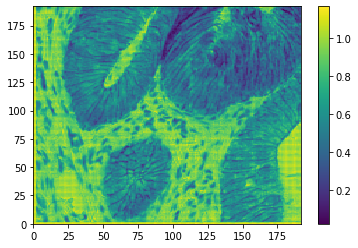

In [19]:
plt.pcolormesh(np.abs(r.obj.array))
plt.colorbar()

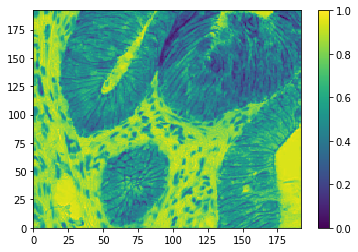

In [20]:
plt.pcolormesh(np.abs(sim.obj.array))
plt.colorbar()